In [1]:
import numpy as np
import pandas as pd
import requests
import regex as re
import nltk
import spacy
import requests

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from xmltodict import parse
from bs4 import BeautifulSoup
from snowballstemmer import TurkishStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from collections import Counter
from xmltodict import parse

import random
from urllib.request import urlopen
import re
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

## Q1
# Chess Transfers
For this question we are going to use the following dataset:

In [2]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess = chess.drop_duplicates(keep='first')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
6,https://ratings.fide.com/fedchange.phtml?year=...,6700284,ESA,HON,11/15/01
7,https://ratings.fide.com/fedchange.phtml?year=...,1613782,AUT,ISR,7/9/01
...,...,...,...,...,...
904,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
905,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
906,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
907,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


The data shows chess grand masters moving one chess federation to another chess federation.

1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.

In [3]:
count = chess['Federation'].value_counts()
count = pd.Series(count,
              name="Transfer Numbers")
count = count.to_frame()
count

,Transfer Numbers
USA,66
GER,41
ESP,32
CAN,30
CRO,28
...,...
JAP,1
LBA,1
MGL,1
LBN,1


2. Sort the table (highest to the lowest.)

In [4]:
aaa = ()
aaa = count.sort_values(by=['Transfer Numbers'], ascending = False)
aaa

,Transfer Numbers
USA,66
GER,41
ESP,32
CAN,30
CRO,28
...,...
ARG,1
URU,1
TTO,1
ESA,1


3. Display the top 10 federations as a bar chart.

<AxesSubplot:>

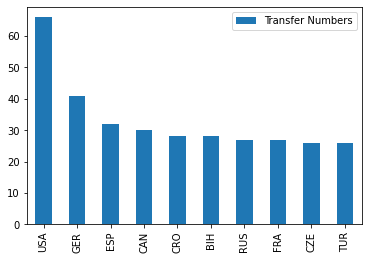

In [5]:
count10 = count.head(10)
count10.plot.bar()

4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.

In [6]:
df2=chess['Form.Fed']+'-'+chess['Federation']
count=Counter(df2)
count

Counter({'PHI-USA': 4,
         'CRO-BIH': 7,
         'YUG-BIH': 1,
         'HON-ESA': 1,
         'ISR-AUT': 1,
         'CAN-AUS': 1,
         'YUG-CAN': 2,
         'AZE-USA': 2,
         'ENG-CAN': 1,
         'GER-ITA': 2,
         'ESP-PAR': 1,
         'GEO-USA': 3,
         'GER-SUI': 6,
         'BEL-YUG': 1,
         'CRO-CHI': 1,
         'RUS-UKR': 6,
         'LBN-SVK': 1,
         'UZB-RUS': 2,
         'RUS-USA': 4,
         'AUT-SUI': 1,
         'ARM-USA': 4,
         'UKR-BUL': 1,
         'MNC-FRA': 1,
         'FRA-ESP': 1,
         'RUS-GER': 11,
         'CAN-YUG': 2,
         'ROM-ESP': 1,
         'ENG-JCI': 1,
         'CAN-ROM': 1,
         'BUL-MKD': 1,
         'ESP-HON': 1,
         'SVK-CAN': 1,
         'IRL-ENG': 1,
         'YUG-SVK': 1,
         'BIH-GER': 2,
         'USA-CAN': 3,
         'UKR-USA': 5,
         'MDA-FRA': 1,
         'SMR-AUT': 1,
         'ISR-CAN': 5,
         'POL-USA': 1,
         'RUS-ISR': 4,
         'JOR-MAR': 1,
         '

5. Filter the dictionary and retain only the pairs that appear 5 or more times.

In [7]:
aaa = dict((k, v) for k, v in count.items() if v >= 5)
print(aaa)

{'CRO-BIH': 7, 'GER-SUI': 6, 'RUS-UKR': 6, 'RUS-GER': 11, 'UKR-USA': 5, 'ISR-CAN': 5, 'CUB-USA': 5, 'CUB-ESP': 5, 'ESP-AND': 6, 'RUS-CZE': 7, 'UKR-GER': 10, 'SCG-CRO': 8, 'SVK-CZE': 8, 'BIH-CRO': 7, 'UKR-RUS': 12, 'SRB-CRO': 6, 'CHN-SIN': 5, 'ENG-WLS': 7, 'SRB-BIH': 16, 'IND-USA': 10, 'ROU-FRA': 6, 'FRA-MNC': 17, 'AZE-TUR': 7}


6. Constuct a directed networkx graph from the keys of the dictionary you constructed in step 5.

In [8]:
bbb=[]
for i in aaa.keys():
    c=i.split('-')
    bbb.append(c)

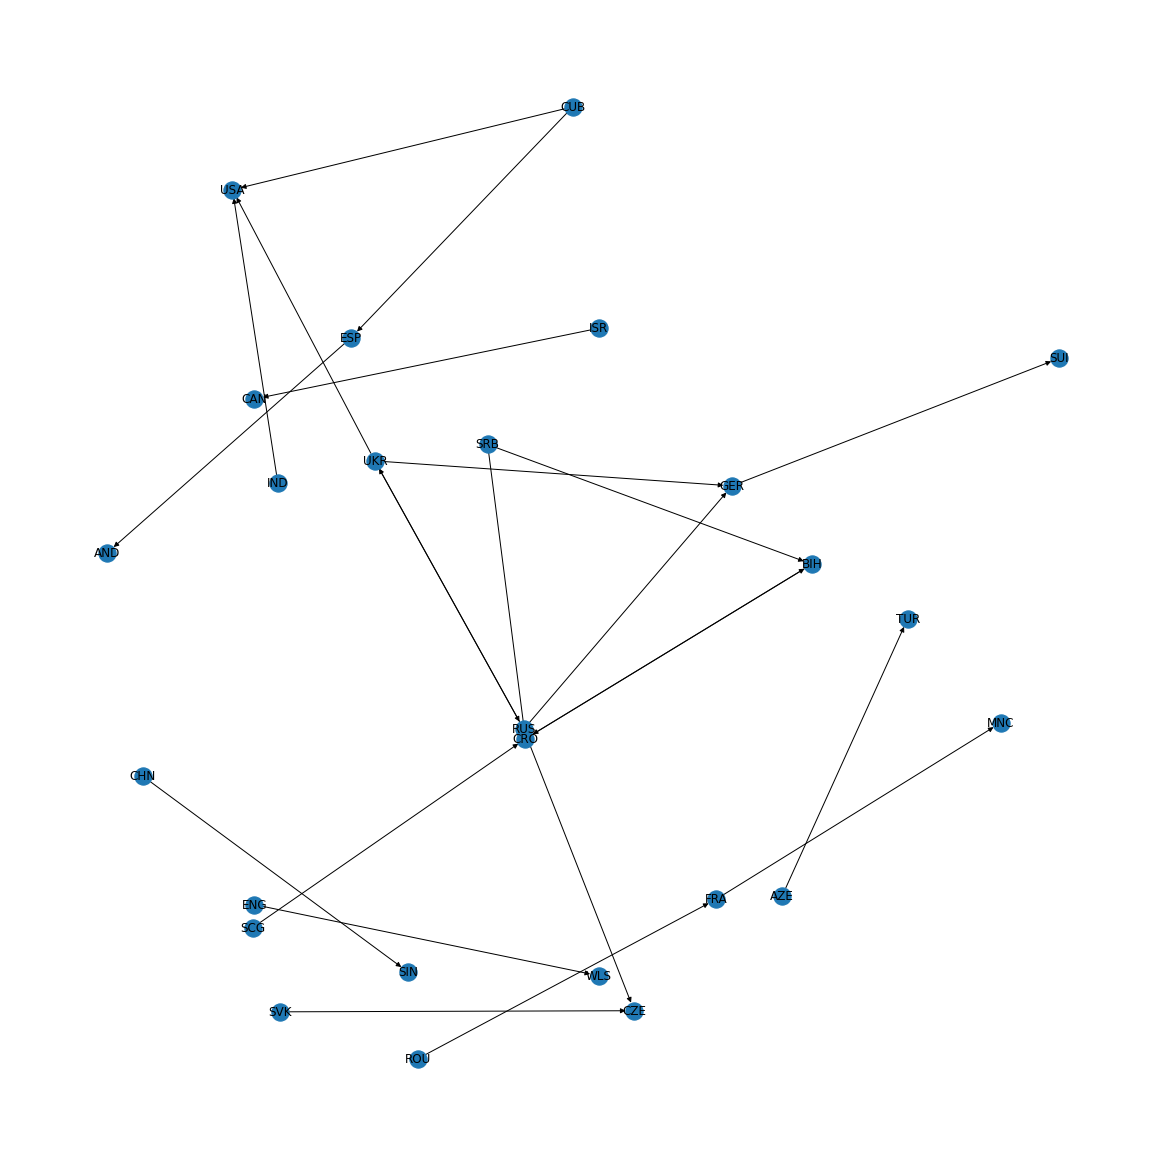

In [9]:
G = nx.DiGraph()
G.add_edges_from(bbb)
plt.figure(figsize=(16,16))
nx.draw_kamada_kawai(G, with_labels=True)

## Q2
# NBA Players
For this question we are going to use the following dataset:

In [10]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty.

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 3 entries: (A,B), (A,C) and (B,C) (write the pairs in the dictionary order).

In [11]:
df = NBA
df

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty.

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 3 entries: (A,B), (A,C) and (B,C) (write the pairs in the dictionary order).
2. Construct a python dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.
3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).

In [12]:
df = df[["PLAYER1_ID","PLAYER1_NAME","PLAYER2_ID","PLAYER2_NAME","PLAYER3_ID","PLAYER3_NAME"]]
playerlist = list()
def isNaN(string):
    return string != string
dict1 = {};
for index,row in df.iterrows():
    player1 = row["PLAYER1_NAME"]
    player2 = row["PLAYER2_NAME"]
    player3 = row["PLAYER3_NAME"]
    if(not isNaN(player1) and not isNaN(player2)):
        if((player1,player2) in dict1):
            dict1[(player1,player2)] +=1
        else:
            dict1[(player1,player2)] =1
    if(not isNaN(player1) and not isNaN(player3)):
        if((player1,player3) in dict1):
            dict1[(player1,player3)] +=1
        else:
            dict1[(player1,player3)] =1
    if(not isNaN(player2) and not isNaN(player3)):
        if((player2,player3) in dict1):
            dict1[(player2,player3)] +=1
        else:
            dict1[(player2,player3)] =1
dict2={}
for (key, value) in dict1.items():
    if value >= 75:
        dict2[key] = value
dict2

{('James Harden', 'Chris Paul'): 98,
 ('Richaun Holmes', 'Deandre Ayton'): 88,
 ('Deandre Ayton', 'Devin Booker'): 102,
 ('Deandre Ayton', 'Richaun Holmes'): 132,
 ('Donovan Mitchell', 'Joe Ingles'): 117,
 ('Derrick Favors', 'Jae Crowder'): 107,
 ('Rudy Gobert', 'Derrick Favors'): 155,
 ('Joe Ingles', "Royce O'Neale"): 99,
 ('Derrick Favors', 'Rudy Gobert'): 97,
 ("Royce O'Neale", 'Joe Ingles'): 100,
 ('Rudy Gobert', 'Donovan Mitchell'): 77,
 ('DeAndre Jordan', 'Luka Doncic'): 88,
 ('Derrick Favors', 'Joe Ingles'): 116,
 ('Jakob Poeltl', 'LaMarcus Aldridge'): 75,
 ('Bryn Forbes', 'DeMar DeRozan'): 98,
 ('Bryn Forbes', 'Patty Mills'): 136,
 ('LaMarcus Aldridge', 'DeMar DeRozan'): 128,
 ('LaMarcus Aldridge', 'Jakob Poeltl'): 117,
 ('Derrick Favors', 'Ricky Rubio'): 79,
 ('Marco Belinelli', 'DeMar DeRozan'): 83,
 ('Rudy Gobert', 'Ricky Rubio'): 108,
 ('Kevin Durant', 'Draymond Green'): 103,
 ('Klay Thompson', 'Kevin Durant'): 151,
 ('Josh Richardson', 'Dwyane Wade'): 128,
 ('Justise Winsl

4. Construct a igraph graph from the data you obtained from step 3.

In [13]:
G = ig.Graph()
aaa = []
for x in dict2.keys():
    if(x[0] not in aaa):
        aaa.append(x[0])
    if(x[1] not in aaa):
        aaa.append(x[1])
G.add_vertices(aaa)
G.add_edges(dict2.keys())

5. Display the graph.

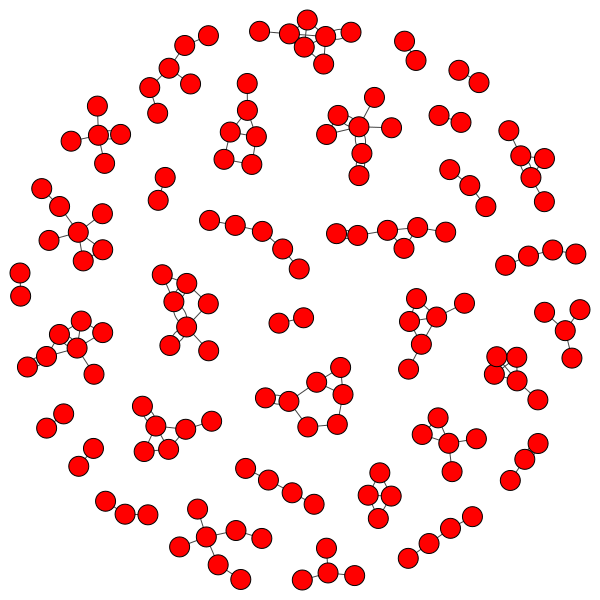

In [14]:
ig.plot(G,with_labels=True)

6. List the maximal cliques using the maximal_cliques of the graph data structure.

In [15]:
print(G.maximal_cliques())

[(152, 151), (34, 35), (38, 39), (38, 35), (40, 41), (42, 43), (43, 44), (44, 45), (51, 57), (51, 52), (52, 54), (52, 53), (54, 137), (55, 56), (56, 120), (56, 102), (70, 67), (71, 60), (80, 77), (81, 73), (87, 84), (88, 31), (89, 90), (90, 140), (90, 94), (90, 91), (91, 92), (93, 49), (94, 141), (95, 67), (97, 98), (98, 101), (99, 100), (104, 28), (105, 106), (109, 72), (112, 110), (114, 115), (118, 150), (118, 119), (121, 124), (121, 122), (123, 124), (125, 35), (131, 132), (132, 133), (133, 134), (135, 136), (138, 139), (142, 126), (143, 116), (145, 146), (147, 110), (148, 116), (149, 116), (150, 151), (4, 3), (8, 7), (11, 12), (23, 25), (23, 24), (27, 22), (30, 31), (31, 32), (33, 29), (130, 127, 129), (2, 3), (0, 1, 63), (0, 1, 113), (5, 6, 9), (64, 58), (65, 67), (65, 66), (67, 68, 69), (72, 73, 108), (10, 6), (73, 79, 108), (74, 96), (74, 75, 78), (13, 14), (14, 107), (14, 16), (15, 17), (15, 16, 19), (17, 107), (75, 77), (76, 77), (77, 96), (28, 29, 103), (116, 117), (82, 83, 8

## Q3
# Charles Dickens' Great Expectations
For this question we are going to use the following dataset:

In [16]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

These are the names of the major characters in the novel:

In [17]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names = set(sorted(names))
names

{'Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle'}

1. Split the text into sentences using a sentence tokenizer from your favorite NLP library.

In [18]:
sentences = sent_tokenize(greatExpectations)
cleanedsentences = []
for sentence in sentences:
    sentence = sentence.lower()
    sentence = re.sub('\n', '', sentence)
    sentence = re.sub('\r', '', sentence)
    cleanedsentences.append(sentence)
cleanedsentences

['my father’s family name being pirrip, and my christian name philip, myinfant tongue could make of both names nothing longer or more explicitthan pip.',
 'so, i called myself pip, and came to be called pip.',
 'i give pirrip as my father’s family name, on the authority of histombstone and my sister,—mrs.',
 'joe gargery, who married the blacksmith.',
 'as i never saw my father or my mother, and never saw any likeness ofeither of them (for their days were long before the days ofphotographs), my first fancies regarding what they were like wereunreasonably derived from their tombstones.',
 'the shape of the letters onmy father’s, gave me an odd idea that he was a square, stout, dark man,with curly black hair.',
 'from the character and turn of the inscription,“_also georgiana wife of the above_,” i drew a childish conclusion thatmy mother was freckled and sickly.',
 'to five little stone lozenges, eachabout a foot and a half long, which were arranged in a neat row besidetheir grave, and 

2. Construct a list of pairs of names: a pair of names (A,B) appears in the list if and only if both A and B appears in the same sentence. When you store the pair (A,B) in the list make sure A appears before B in the alphabetical order.


In [19]:
pairs = []
for sentence in cleanedsentences:
    words = word_tokenize(sentence)
    temp = []
    for n in names:
        if(n.lower() in words):
            temp.append(n)
    temp.sort()
    if(len(temp)==2):
        pairs.append((temp[0],temp[1]))
    elif(len(temp)==3):
        pairs.append((temp[0],temp[1]))
        pairs.append((temp[0],temp[2]))
        pairs.append((temp[1],temp[2]))
    elif(len(temp)==4):
        pairs.append((temp[0],temp[1]))
        pairs.append((temp[0],temp[2]))
        pairs.append((temp[1],temp[2]))
        pairs.append((temp[0],temp[3]))
        pairs.append((temp[1],temp[3]))
        pairs.append((temp[2],temp[3]))
print(pairs)

[('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Hubble', 'Joe'), ('Hubble', 'Pumblechook'), ('Joe', 'Pumblechook'), ('Hubble', 'Wopsle'), ('Joe', 'Wopsle'), ('Pumblechook', 'Wopsle'), ('Hubble', 'Pumblechook'), ('Hubble', 'Wopsle'), ('Pumblechook', 'Wopsle'), ('Joe', 'Pumblechook'), ('Richard', 'Wopsle'), ('Hubble', 'Pumblechook'), ('Hubble', 'Pumblechook'), ('Hubble', 'Wopsle'), ('Pumblechook', 'Wopsle'), ('Joe', 'Pumblechook'), ('Hubble', 'Joe'), ('Joe', 'Pumblechook'), ('Hubble', 'Joe'), ('Hubble', 'Wopsle'), ('Joe', 'Wopsle'), ('Joe', 'Wopsle'), ('Joe', 'Wopsle'), ('Joe', 'Wopsle'), ('Joe', 'Wopsle'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Wopsle'), ('Biddy', 'Wopsle'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 'Pip'), ('Joe', 

3. Construct a python dictionary where the keys are pairs of names and values are the number of times each pair appears in the list you constructed in step 2.
4. Filter the list and retain only those pairs that appear more than twice (i.e. 3 or more).

In [20]:
count = Counter(pairs)
newdict = {}
for x in count:
    if(count[x] >= 3):
        newdict[x] = count[x]
newdict

{('Joe', 'Pip'): 80,
 ('Hubble', 'Joe'): 5,
 ('Hubble', 'Pumblechook'): 4,
 ('Joe', 'Pumblechook'): 19,
 ('Hubble', 'Wopsle'): 4,
 ('Joe', 'Wopsle'): 12,
 ('Pumblechook', 'Wopsle'): 5,
 ('Biddy', 'Wopsle'): 4,
 ('Havisham', 'Joe'): 26,
 ('Joseph', 'Pumblechook'): 9,
 ('Havisham', 'Pumblechook'): 7,
 ('Pip', 'Pumblechook'): 4,
 ('Estella', 'Havisham'): 46,
 ('Estella', 'Joe'): 8,
 ('Pocket', 'Sarah'): 17,
 ('Havisham', 'Pocket'): 9,
 ('Havisham', 'Sarah'): 4,
 ('Havisham', 'Pip'): 23,
 ('Joe', 'Orlick'): 5,
 ('Biddy', 'Joe'): 44,
 ('Biddy', 'Pip'): 19,
 ('Biddy', 'Estella'): 3,
 ('Pocket', 'Wemmick'): 4,
 ('Herbert', 'Pocket'): 9,
 ('Havisham', 'Herbert'): 9,
 ('Flopson', 'Jane'): 4,
 ('Flopson', 'Pocket'): 7,
 ('Jane', 'Pocket'): 7,
 ('Pip', 'Pocket'): 4,
 ('Drummle', 'Pocket'): 5,
 ('Pip', 'Wemmick'): 23,
 ('Drummle', 'Herbert'): 5,
 ('Herbert', 'Joe'): 6,
 ('Estella', 'Pip'): 7,
 ('Handel', 'Herbert'): 20,
 ('Estella', 'Herbert'): 5,
 ('Clara', 'Herbert'): 14,
 ('Skiffins', 'Wemmick'

5. Construct a networkx graph using the pairs you have from step 4.

In [21]:
G = nx.DiGraph()
G.add_nodes_from(names)
G.add_edges_from(newdict)
plt.figure(figsize=(10,10));

<Figure size 720x720 with 0 Axes>

6. Display the graph.

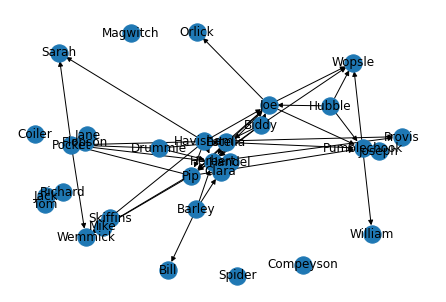

In [22]:
nx.draw(G,with_labels=True)